# Word2Vec 직접 구현

In [1]:
doc = 'you will never know until you try'

In [3]:
# 1. 입력 문장 토큰화

tokens = doc.split()
tokens

['you', 'will', 'never', 'know', 'until', 'you', 'try']

In [4]:
# 가중치 행렬 초기화
V = len(set(tokens)) # 유니크한 단어 수
N = 4 # 임베딩 차원 수

import numpy as np

W1 = np.random.rand(V, N)
W2 = np.random.rand(N, V)

In [5]:
W1

array([[0.16706635, 0.50201166, 0.26023192, 0.0909682 ],
       [0.80627133, 0.46452407, 0.02396506, 0.89092634],
       [0.43522734, 0.83778993, 0.43958554, 0.61408447],
       [0.74132226, 0.83938373, 0.82681653, 0.70989679],
       [0.32434718, 0.88594071, 0.26621789, 0.1628421 ],
       [0.3454707 , 0.56313297, 0.57234765, 0.56572554]])

In [7]:
print(W2)

[[0.8258209  0.72145237 0.69240276 0.10646522 0.31520983 0.37404955]
 [0.67202008 0.39856966 0.28578391 0.11975541 0.66936122 0.62968863]
 [0.34658711 0.45770879 0.83354775 0.99485189 0.6242996  0.78705514]
 [0.31887058 0.26235249 0.5547687  0.49502284 0.53884625 0.33314883]]


In [9]:
one_hot_vector = np.eye(V)
word2idx = {v: i for i, v in enumerate(set(tokens))}

In [10]:
word2idx

{'until': 0, 'will': 1, 'never': 2, 'you': 3, 'know': 4, 'try': 5}

In [12]:
# 학습을 위한 데이터 구축
training_data = [
    # [target_word, (context_words)]
]

window_size = 1
for i, token in enumerate(tokens):
    target_word = token
    context_words = []
    if i-1 >= 0:
        context_words.append(tokens[i-1])
    if i+1 < len(tokens):
        context_words.append(tokens[i+1])
    training_data.append([target_word, context_words])
training_data

[['you', ['will']],
 ['will', ['you', 'never']],
 ['never', ['will', 'know']],
 ['know', ['never', 'until']],
 ['until', ['know', 'you']],
 ['you', ['until', 'try']],
 ['try', ['you']]]

In [14]:
W1

array([[0.16706635, 0.50201166, 0.26023192, 0.0909682 ],
       [0.80627133, 0.46452407, 0.02396506, 0.89092634],
       [0.43522734, 0.83778993, 0.43958554, 0.61408447],
       [0.74132226, 0.83938373, 0.82681653, 0.70989679],
       [0.32434718, 0.88594071, 0.26621789, 0.1628421 ],
       [0.3454707 , 0.56313297, 0.57234765, 0.56572554]])

In [37]:
# 학습

learning_rate = 0.01

loss_list = []
for epoch in range(100):
    loss_total = 0.0
    for target_word, context_words in training_data:
        # Feed Forward
        # 1. Input - Hidden
        for word in context_words:
            hidden_vector = one_hot_vector[word2idx[word], :].reshape(1, V).dot(W1) # 1x4 행렬
            # print(hidden_vector)

            # 2. Hidden - Output
            output_vector = hidden_vector.dot(W2) # 1x6 행렬

            # Activation Function (Softmax)
            def softmax(x):
                return np.exp(x) / np.sum(np.exp(x))

            y_hat = softmax(output_vector)
            y_real = one_hot_vector[word2idx[target_word], :] # (6, )

            # 3. Loss 계산 cross entropy loss
            loss = -np.sum(y_real * np.log(y_hat))

            loss_total += loss

            # 4. Backpropagation
            gradient_w2 = hidden_vector.T.dot(y_hat - y_real) # 1x4 * 1x6 -> 4x6
            # print(gradient_w2)
            # one hot vector = 1x6
            # w2 4x6
            # y_hat - y_real # 1x6
            # 4x1.T => 1x4

            # w1 특정 부분만 업데이트 (1x4)
            gradient_w1 = (y_hat-y_real).dot(W2.T)
            # print(gradient_w1)

            W1[word2idx[word], :] -= learning_rate * gradient_w1.ravel()
            W2 -= learning_rate * gradient_w2
        loss_list.append(loss)


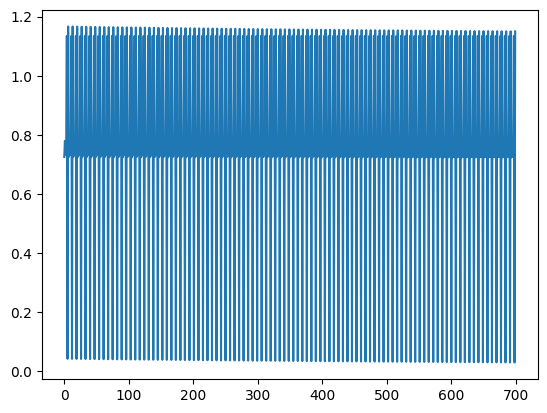

In [38]:
import matplotlib.pyplot as plt

plt.plot(loss_list)

In [29]:
W1, W2

(array([[-0.53169591,  0.40432357,  0.58534896,  0.49075588],
        [ 0.68435442, -0.05822517,  0.35754375,  1.35238542],
        [ 0.25405085,  1.12678136,  0.2775227 ,  0.54253679],
        [ 1.07120633,  1.13849298,  0.59088685,  0.14624874],
        [ 0.83875424,  0.79405718, -0.03757834,  0.14450889],
        [ 0.03276377,  0.26370978,  0.98709078,  0.92783583]]),
 array([[ 1.0500486 ,  0.82111749,  0.95052545, -0.03154555, -0.24605884,
          0.49131347],
        [ 0.824648  ,  0.73143639,  0.05188798, -0.06981234,  0.80297953,
          0.43403934],
        [ 0.26581543,  0.58350916,  0.38927716,  1.43045268,  0.6161534 ,
          0.75884247],
        [-0.11846091,  0.21595192,  0.70374683,  1.27102764,  0.46450329,
         -0.03375907]]))

# 1 Word2Vec

In [ ]:
# 필요한 데이터를 불러와 it_df와 culture_df에 저장한다
import pandas as pd
it_df = pd.read_csv('./Word Representation_it.csv').dropna()
culture_df = pd.read_csv('./Word Representation_culture.csv').dropna()

In [ ]:
# word2vec을 하기 위한 전처리
# it_df와 culture_df의 컬럼 '1'의 토큰을 리스트 형태로 변경
it_token_ls = list(it_df.loc[:,'1'])
culture_token_ls = list(culture_df.loc[:,'1'])

total_token_ls = it_token_ls + culture_token_ls  # it_df의 리스트와 culture_df의 리스트를 한개로 합침

# 리스트의 값을 ','로 분리
total_token_ls = [tokens.split(',') for tokens in total_token_ls]
print(total_token_ls[0][:10])

In [ ]:
# gensim이라는 패키지에 word2Vec 클래스 사용
from gensim.models import Word2Vec
word2vec = Word2Vec( sentences = total_token_ls,      # 학습시킬 문장
                     vector_size = 10,         # 임베딩된 단어 벡터의 차원 크기
                     alpha = 0.025,     # 학습률(Learning rate)
                     min_count=2,       # 2번 미만 등장한 단어는 제외
                     window = 8,        # 문맥의 크기 (window_size)
                     sample = 0.001,    # sub-sampling
                     sg = 1,            # 0: CBOW, 1: Skip-gram
                     epochs = 10)         # 전체 문장 반복학습 횟수(epoch)


In [ ]:
# '인공'의 단어 임베딩
word_embedding = word2vec.wv.__getitem__('인공')
print(word_embedding)

In [ ]:
# '데이터'의 단어 임베딩
word_embedding = word2vec.wv.__getitem__('데이터')
print(word_embedding)

In [ ]:
# '인공'과 유사도가 높은 단어
word_similar_1 = word2vec.wv.most_similar('인공')
print(word_similar_1)

#'데이터'와 유사도가 높은 단어
word_similar_2 = word2vec.wv.most_similar('데이터')
print(word_similar_2)


# 2 GloVe

- 더이상 지원하지 않음

In [ ]:
# !pip install glove_python_binary

# from glove import Corpus, Glove

# corpus = Corpus()
# corpus.fit(total_token_ls, window=5)
# # 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성

# glove = Glove(no_components=100, learning_rate=0.05)
# glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
# glove.add_dictionary(corpus.dictionary)
# # 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

# glove.most_similar("인공")
# glove.most_similar("지능")

# 3 FastText

In [ ]:
from gensim.models.word2vec import Text8Corpus
from gensim.models import FastText

# FastText 모델생성
ft_model = FastText(total_token_ls,
                      vector_size=10,                 # 임베딩된 단어 벡터의 차원 크기
                      window=8,                 # 문맥의 크기(window_size)
                      min_count=2,            # 2번 미만 등장한 단어는 제외
                      alpha = 0.025,                    # 학습률(Learning rate)
                      sg = 1,                             # 0: CBOW, 1: Skip-gram
                      epochs = 10,              # 전체 문장 반복학습 횟수(epoch)
                      min_n=3, max_n=6)            # 최소, 최대 N-gram 수

In [ ]:
# Getting most similar vectors
print(ft_model.wv.most_similar('인공'))

# Getting most similar vectors
print(ft_model.wv.most_similar('안공지능'))

In [ ]:
ft_model.wv['너지']